In [1]:
module LifeGame

using Plots
using ProgressMeter

struct Board{T}
    state::T
    tmp::T
end
Board(state) = Board(state, similar(state))
function fivexfive(n=200)
    state = zeros(Int8, n, n)
    m = n ÷ 2
    state[m-2:m+2, m-2:m+2] .= [1 1 1 0 1; 1 0 0 0 0; 0 0 0 1 1; 0 1 1 0 1; 1 0 1 0 1]
    Board(state)
end
randboard(n=200) = Board(rand(Int8[0, 1], n, n))

P(i, m) = ifelse(i == m, 1, i+1)
Q(i, m) = ifelse(i == 1, m, i-1)
function _update!(v, u)
    m, n = size(u)
    @inbounds for j in 1:n, i in 1:m
        i₊, i₋, j₊, j₋ = P(i, m), Q(i, m), P(j, n), Q(j, n)
        N = u[i₋,j₋] + u[i,j₋] + u[i₊,j₋] + u[i₋,j] + u[i₊,j] + u[i₋,j₊] + u[i,j₊] + u[i₊,j₊]
        v[i,j] = N == 3 ? 1 : (N == 2 && !iszero(u[i,j])) ? 1 : 0
    end
end

function update!(board::Board, niters=1)
    state, tmp = board.state, board.tmp
    for _ in 1:niters÷2
        _update!(tmp, state)
        _update!(state, tmp)
    end
    if isodd(niters)
        _update!(tmp, state)
        state .= tmp
    end
end

function gif!(board::Board, niters, nskips=1; gifname="life.gif", fps=20, size=(240, 240))
    prog = Progress(niters, 0)
    anim = @animate for t in 1:niters
        heatmap(board.state; size, colorbar=false, ticks=false, axis=false, frame=false)
        update!(board, nskips)
        next!(prog)
    end
    gif(anim, gifname; fps)
end

end

Main.LifeGame

Progress: 100%|█████████████████████████████████████████| Time: 0:00:2639m
┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0014\liferandom.gif
└ @ Plots D:\.julia\packages\Plots\Awg62\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0014\\liferandom.gif")
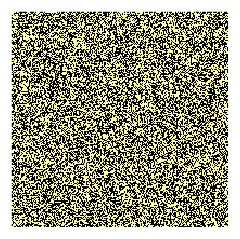

In [2]:
boardrandom = LifeGame.randboard()
LifeGame.gif!(boardrandom, 500; gifname="liferandom.gif")

Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0014\life5x5.gif
└ @ Plots D:\.julia\packages\Plots\Awg62\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0014\\life5x5.gif")
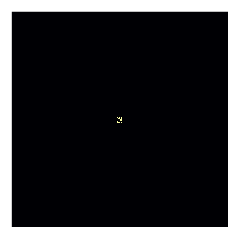

In [3]:
board5x5 = LifeGame.fivexfive()
LifeGame.gif!(board5x5, 2000; gifname="life5x5.gif", fps=60)

In [4]:
state = Int8[
    0 0 0 0 0 0 0
    0 0 0 0 0 0 0
    0 0 0 0 0 0 0
    0 0 0 0 0 0 0
    0 1 1 0 0 0 0
    1 0 1 0 0 0 0
    0 0 1 0 0 0 0
]
board = LifeGame.Board(state)
board.state

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  1  1  0  0  0  0
 1  0  1  0  0  0  0
 0  0  1  0  0  0  0

In [5]:
LifeGame.update!(board, 12)
board.state

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  0  0  1  1  0
 0  0  0  1  0  1  0
 0  0  0  0  0  1  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0014\lifeglider.gif
└ @ Plots D:\.julia\packages\Plots\Awg62\src\animation.jl:104


Plots.AnimatedGif("D:\\OneDrive\\public\\0014\\lifeglider.gif")
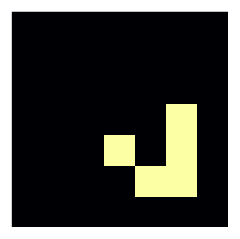

In [6]:
LifeGame.gif!(board, 27; gifname="lifeglider.gif", fps=5)